In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('mymoviedb.csv' , lineterminator = '\n' )

In [4]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [6]:
df['Genre'].head(10)

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
5               Action, Crime, Thriller
6             Horror, Mystery, Thriller
7                              Thriller
8                Action, Crime, Fantasy
9                       Science Fiction
Name: Genre, dtype: object

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9822    False
9823    False
9824    False
9825    False
9826    False
Length: 9827, dtype: bool

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [10]:
df['Release_Date']= pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtypes)

datetime64[ns]


In [11]:
df['Release_Date']=df["Release_Date"].dt.year
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Dropping the columns 

In [12]:
df.drop(['Overview','Poster_Url'],axis=1,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Original_Language', 'Genre'],
      dtype='object')

In [13]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,en,Thriller
3,2021,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


# Categorize the Vote_Average column 
Cut the Vote_Average  values and make 4 categotise  popular , average ,below_average, not_popular by using categorize_col function

In [14]:
def categorize_col(df,col,labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col]= pd.cut(df[col], edges, labels = labels , duplicates= 'drop')
    return df

In [15]:
labels = ['not_popular', 'below-avg' , 'average' , 'popular']
categorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below-avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below-avg' < 'average' < 'popular']

In [16]:
df.head(10)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below-avg,en,Thriller
3,2021,Encanto,2402.201,5076,popular,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,en,"Action, Adventure, Thriller, War"
5,2022,The Commando,1750.484,33,average,en,"Action, Crime, Thriller"
6,2022,Scream,1675.161,821,average,en,"Horror, Mystery, Thriller"
7,2022,Kimi,1601.782,206,below-avg,en,Thriller
8,2022,Fistful of Vengeance,1594.013,114,not_popular,en,"Action, Crime, Fantasy"
9,2021,Eternals,1537.406,4726,popular,en,Science Fiction


In [17]:
df.tail(4)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
9823,2020,Violent Delights,13.356,8,not_popular,es,Horror
9824,2016,The Offering,13.355,94,not_popular,en,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,en,"Music, Drama, History"
9826,1984,Threads,13.354,186,popular,en,"War, Drama, Science Fiction"


In [18]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date         0
Title                0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
dtype: int64

In [19]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below-avg,en,Thriller
3,2021,Encanto,2402.201,5076,popular,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,en,"Action, Adventure, Thriller, War"


# Split genre into a list and then explode our dataframe to have only one genre per row foe each movie 

In [20]:
df['Genre']= df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction
3,2022,The Batman,3827.658,1151,popular,en,Crime
4,2022,The Batman,3827.658,1151,popular,en,Mystery


In [21]:
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Release_Date       25552 non-null  int32   
 1   Title              25552 non-null  object  
 2   Popularity         25552 non-null  float64 
 3   Vote_Count         25552 non-null  int64   
 4   Vote_Average       25552 non-null  category
 5   Original_Language  25552 non-null  object  
 6   Genre              25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(2)
memory usage: 949.2+ KB


In [23]:
df.nunique()

Release_Date          100
Title                9415
Popularity           8088
Vote_Count           3265
Vote_Average            4
Original_Language      42
Genre                  19
dtype: int64

In [24]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction
3,2022,The Batman,3827.658,1151,popular,en,Crime
4,2022,The Batman,3827.658,1151,popular,en,Mystery


# Data Visulization

In [25]:
sns.set_style('whitegrid')

In [26]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

# What is the most freuent Genre in the dataset ?

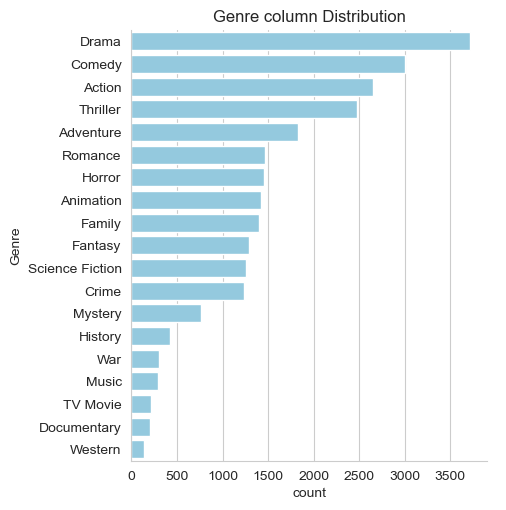

In [27]:
sns.catplot( y= 'Genre' , 
            data= df , 
            kind = 'count' ,
            order = df['Genre'].value_counts().index,
            color= 'skyblue')
plt.title('Genre column Distribution')
plt.show()

# What Genre has highest Votes?

In [28]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction
3,2022,The Batman,3827.658,1151,popular,en,Crime
4,2022,The Batman,3827.658,1151,popular,en,Mystery


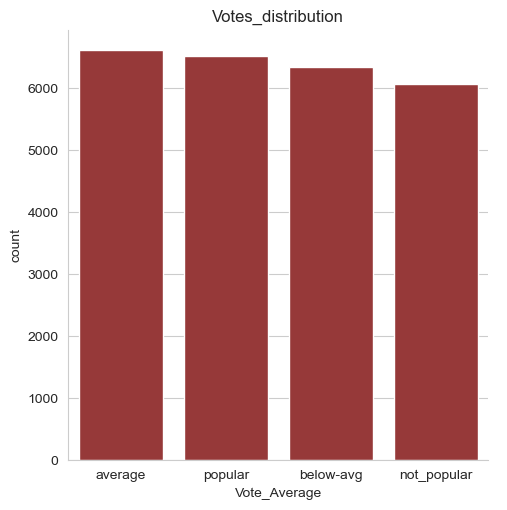

In [29]:
sns.catplot(x='Vote_Average',
            data = df, kind = "count", 
            order = df['Vote_Average'].value_counts().index,
            color = "brown")
plt.title("Votes_distribution")
plt.show()

# Which movie got the highest popularity? What's its genre?

In [30]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction


# Which movie got the lowest popularity? What's its genre?

In [31]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,en,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,en,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,en,History
25549,1984,Threads,13.354,186,popular,en,War
25550,1984,Threads,13.354,186,popular,en,Drama
25551,1984,Threads,13.354,186,popular,en,Science Fiction


# Which year has the most filmmed  movies?

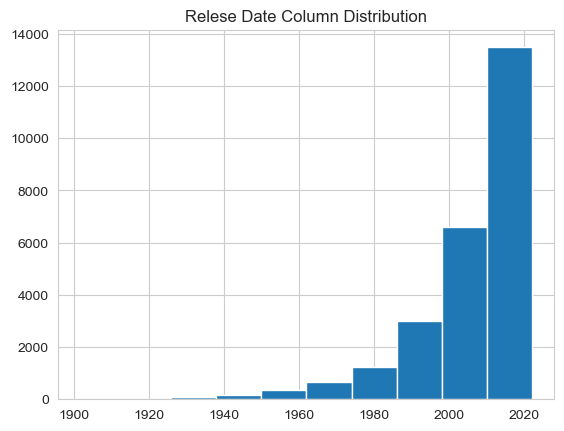

In [32]:
df['Release_Date'].hist()
plt.title('Relese Date Column Distribution')
plt.show()

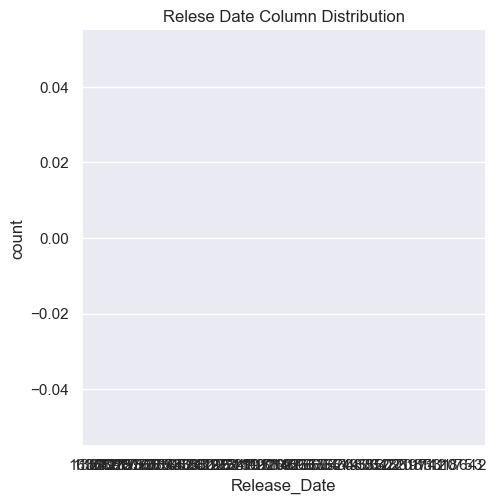

In [43]:
sns.catplot(x='Release_Date',
            data = df, kind = "count", 
            order = df['Release_Date'].value_counts(),
            color = "brown")
plt.title("Relese Date Column Distribution")
sns.set(rc={"figure.figsize":(200,5)})
plt.show()